ks =  0.010566057391897773
Ustar =  0.015449823694138661


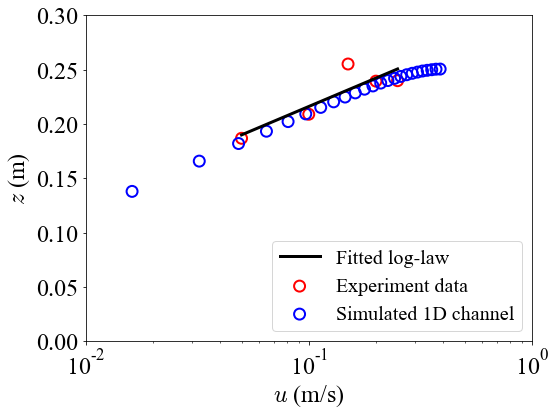

In [5]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def plot_loglaw(folder,line,label):
    #plot profile from OF simulation
   
    fileName = "simulated_profile.xy"
   
    y=[]
    Uf=[]
          
    abc =np.loadtxt(fileName,skiprows=0)
    for z in abc:
        y.append(z[0])   
        Uf.append(z[1])    
    plt.scatter(y[0:len(y):4],Uf[0:len(y):4], marker = "o", s = 120, edgecolor = line, facecolor='None', linewidth=2, label=label)


def log_func(z,ks, Ustar):
    nu=10**-6
    ks_plus = ks*Ustar/nu
    B=5.2
    if(ks_plus<=2.5):   
        DeltaB=0
    elif(ks_plus>2.5 and ks_plus<90 ):
        DeltaB=(B-8.5+1/0.41*np.log(ks_plus))*np.sin(0.4258*(np.log(ks_plus)-0.811))
    else:
        DeltaB=B-8.5+1/0.41*np.log(ks_plus)

    return (1/0.41*np.log(z*Ustar/nu)+B-DeltaB)*Ustar

plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Times New Roman'
axis_font = {'fontname':'Times New Roman', 'size':'14'}
plt.rcParams['mathtext.fontset'] ='cm'
fig = plt.figure(figsize=(8,6))

###Curve fitting
z, U = np.loadtxt('inlet_profile_center.txt', unpack=True, skiprows=1)

fitting_parameters, covariance = curve_fit(log_func, z, U)
ks, Ustar = fitting_parameters

plt.scatter(z, U, marker = "o", s = 120, edgecolor = "r", facecolor='None', linewidth=2, label='Experiment data') 

plt.plot(z, log_func(z, *fitting_parameters), '-k',lw=3, label='Fitted log-law')



print("ks = ", ks)
print("Ustar = ", Ustar)
plt.xlabel('$u$ (m/s)') 
plt.ylabel('$z$ (m)') 


plot_loglaw('initChannel_largeCylinder_high','b',"Simulated 1D channel")
plt.xlim(0.01,1)
plt.ylim(0,0.3)
plt.tick_params(axis='both', which='major')

plt.legend(loc='lower right',fontsize=20,frameon=True)    
ax = plt.gca()
ax.set_xscale('log')

plt.show()

